# **Final project: Customer Segmentation**


In this project, I will perform Customer Segmentation on a dataset of shop customers using three distinct Clustering techniques. Clustering is an unsupervised learning algorithm, aims to group similar data points based on shared characteristics. The primary goal of clustering is to uncover patterns and similarities within a dataset, enabling the grouping of similar data points while preserving a clear distinction between dissimilar ones.

<div align="center">
  <img src="1.png">
</div>

<div align="center">
  <img src="2.png">
</div>

<div align="center">
  <img src="3.png">
</div>

This dataset is comprehensive, offering a detailed analysis of the ideal customers for a hypothetical shop. By collecting and analyzing customer data through membership cards, this dataset provides valuable insights that can help a business better understand its customers. Additionally, this dataset is governed by the [DbCL v1.0 Database Contents License](https://opendatacommons.org/licenses/dbcl/1-0/)

The dataset comprises 2000 records and 8 columns, providing a wealth of information about the shop's customer base. Each column represents a specific aspect of the customer's profile, including their unique Customer ID, Gender, Age, Annual Income, Spending Score, Profession, Work Experience, and Family Size.

Analyzing this data enables businesses to gain valuable insights into customer preferences, behaviors, and purchasing habits. For example, they can segment customers by age, income, or family size to better understand how these factors impact purchasing decisions.

- `Customer ID`: A unique identifier assigned to each customer in the dataset, used to differentiate between individual customers and track their purchases and other behaviors.

- `Gender`: The customer's gender, either male or female. Gender analysis can provide insights into purchasing behavior and preferences between genders.

- `Age`: The customer's age, typically measured in years. Age segmentation helps identify purchasing patterns and preferences among different age groups.

- `Annual Income`: The customer's annual income, usually measured in dollars or another currency. Income segmentation helps identify purchasing patterns and preferences among different income levels.

- `Spending Score`: A score assigned by the shop based on the customer's behavior and spending nature. This score helps segment customers based on purchasing patterns, such as high-spending, low-spending, and those likely to make impulse purchases.

- `Profession`: The customer's occupation or profession. Profession analysis helps understand purchasing patterns and preferences among different professions.

- `Work Experience`: The number of years of work experience of the customer. This feature helps segment customers based on experience level, identifying purchasing patterns and preferences.

- `Family Size`: The size of the customer's family, usually measured by the number of family members. Family size analysis helps understand purchasing patterns and preferences among different family sizes, such as families with children versus families without children."

# Objectives

* `Evaluate` and compare the performance of three unsupervised learning clustering methods.

* `Preprocess` and transform customers data to optimize its suitability for machine learning model training.

* `Train` and fine-tune the three classification models rigorously, utilizing a variety of appropriate techniques and strategies.

* `Assess` the models' performance in terms of key metrics such as Davies-Bouldin, Calinski Harabasz, and Silhouette Score, and select the method that best performs clustering.


## Set Up

In [ ]:
# Force no warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Data
import numpy as np
import pandas as pd

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE


# Clustering Models
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


In [ ]:
data = pd.read_csv('..\\Dataset\\Customers.csv')

In [ ]:
data.shape

(2000, 8)

In [ ]:
data.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

<div align="center">
  <img src="data_cleaning.png">
</div>

**In this section** 
* Data Cleaning
* Feature Engineering 

In order to get a full grasp of what steps should I be taking to clean the dataset. 
Let us have a look at the information in data. 

In [ ]:
data.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [ ]:
# Inpute the missing value by the Model Value
data.Profession.fillna('mode', inplace=True)

In [ ]:
# Quick check
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [ ]:
data.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


<div align="center">
  <img src="data_visualization.png">
</div>

In [ ]:
# Obtain the count of each gender in the dataset
gender_count = data['Gender'].value_counts()

# Create a pie chart to visualize the distribution of gender in the dataset
fig = px.pie(values=gender_count, names=gender_count.index)

# Enhance the plot by adding a title and labels
fig.update_layout(title="Distribution of Gender in the Dataset", height=400, width=500)

# Create a bar chart to visualize the distribution of gender in the dataset 
fig2 = px.bar(y=gender_count, x=gender_count.index, color=gender_count.index, height=400, width=500)

# Display the plot
fig.show()
fig2.show()

![](distribution_gender.png)
![Distribution Gender Bar Chart](distribution_gender_bar.png)

The dataset shows a clear gender imbalance, with significantly more `female` candidates (around 1,200) than `male` candidates (approximately 800). This raises concerns about potential bias in the dataset, which could impact the performance of machine learning models trained on this data, especially if used to predict outcomes or make decisions influenced by gender-related factors.

To better understand how gender affects other features in the dataset, it's essential to explore the relationships and correlations between gender and other variables. This analysis will provide insights into how gender may be influencing different aspects of the data, enabling a more nuanced interpretation of the dataset and potential adjustments in model training or evaluation processes.

In [ ]:
# Create a box plot of Age by Gender
age_gender_boxplot = px.box(data, x='Gender', y='Age', color='Gender', title='Distribution of Age by Gender',width=400, height=500)

# Display the plot
age_gender_boxplot.show()

![](boxplot.png)

The box plot provides clear insights into the distribution of age by gender. From the plot, it is evident that gender does not appear to significantly impact the distribution of age. Both male and female genders have similar age distributions with no significant differences.

In [ ]:
# Create a box plot of Age by Gender
anual_income_gender_boxplot = px.box(data, x='Gender', y='Annual Income ($)', color='Gender', title='Distribution of Anual Income ($) by Gender', width= 400, height=500)

# Display the plot
anual_income_gender_boxplot.show()

![](bxplot.png)

The distribution of annual income versus gender is similar to the distribution of age versus gender. There is no significant impact of gender on the annual income.

In [ ]:
# Create a histogram of the 'Age' column, and include the Violin plot to show the distribution
fig = px.histogram(data, x='Age', marginal='violin',barmode ='overlay',title ='Histogram of Age', width=800, height=500)
# Display the plot
fig.show()

![](histogram.png)

Upon analyzing the age distribution of the dataset, we observe that it is fairly uniform across the entire age range, ranging from 0 to 100. Despite a small peak in the age range of 30-34, which deviates slightly from a normal distribution, it still falls within an acceptable range. Thus, from a statistical perspective, we can conclude that the data is not skewed or biased with respect to age.

Furthermore, from a machine learning and deep learning point of view, it is essential to have a balanced dataset that covers all age groups to ensure optimal model performance. Therefore, this balanced distribution of age can be beneficial for building accurate and robust models that can generalize well on unseen data.

In [ ]:
# Create violin plot for Age versus Profession
fig1 = px.violin(data, x='Age', y='Profession', color='Profession', title='Age Distribution across Professions', width=800,height=500)

# Create box plot for Age versus Profession
fig2 = px.box(data, x='Age', y='Profession', color='Profession', title='Age Distribution across Professions',width=800,height=500)

# Display the plots
fig1.show()
fig2.show()

![](professions.png)
![](professions2.png)

In [ ]:
# Create a density contour plot to show the relationship between age and work experience
fig1 = px.density_contour(data, x='Age', y='Work Experience', title='Density Contour Plot', width = 800, height = 600)

# Create a density heatmap to show the distribution of age and work experience
fig2 = px.density_heatmap(data, x='Age', y='Work Experience', title='Density Heatmap', width = 800, height = 600)

# Show the plots
fig1.show()
fig2.show()

![](density.png)
![](heatmap.png)

In analyzing this density map, we observe that the growth in Age is not as pronounced as that in Work Experience, mirroring real-world trends.

Text(0.5, 1.0, 'Correlation matrix')

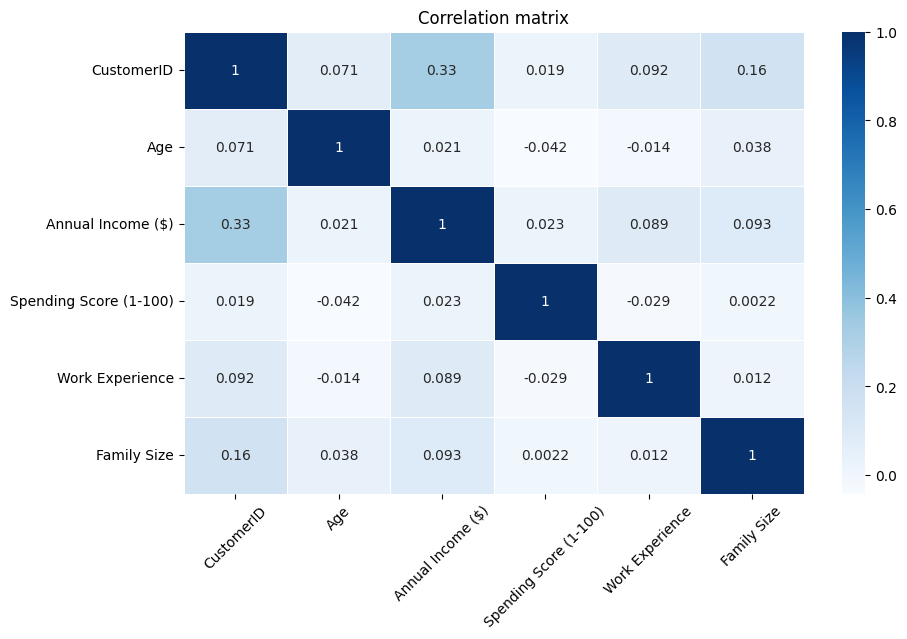

In [ ]:
corr_matrix = data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.xticks(rotation=45)
plt.title("Correlation matrix")

The colored cells indicate the strength and direction of the correlation between variables. Cells closer to 1 indicate a strong positive correlation, while cells near -1 indicate a strong negative correlation. Cells close to 0 indicate a weak or null correlation.
No clear linear correlation is observed among the features. So, based on simple intuition, let's analyze Annual Income ($) and Spending Score (1-100).

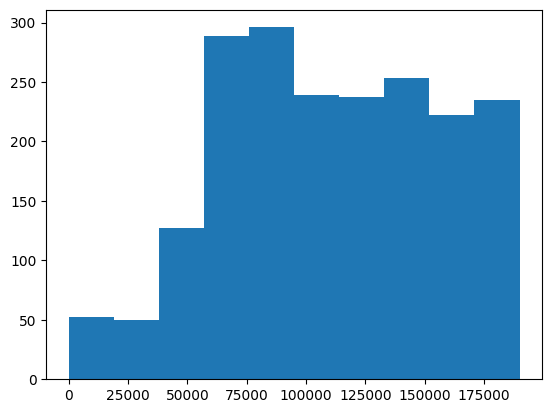

In [ ]:
plt.hist(data['Annual Income ($)'], bins=10)
plt.show()

Our distribution appears slightly skewed to the left.

Let's take a look at people's annual income vs. spending score:

,Annual Income ($),Spending Score (1-100)
Annual Income ($),1.000000,0.023299
Spending Score (1-100),0.023299,1.000000


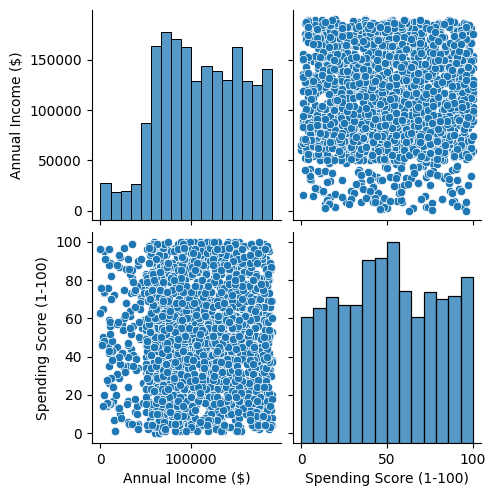

In [ ]:
sns.pairplot(data[['Annual Income ($)','Spending Score (1-100)']])
data[['Annual Income ($)','Spending Score (1-100)']].corr()

<div align="center">
  <img src="application_models.png">
</div>

# K MEANS

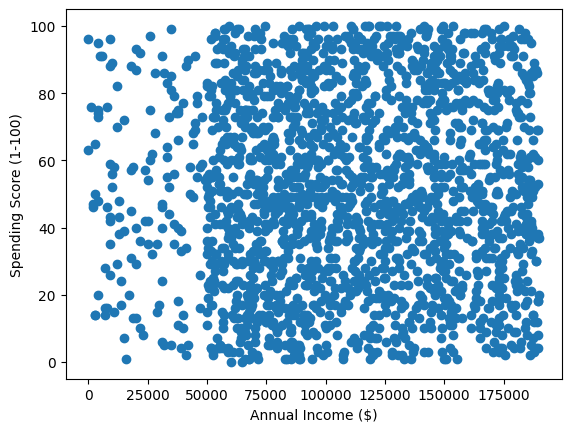

In [ ]:
X = data[['Annual Income ($)', 'Spending Score (1-100)']]
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [ ]:
inertia = []
for k in range(1, 26):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_standardized)
    inertia.append(kmeans.inertia_)

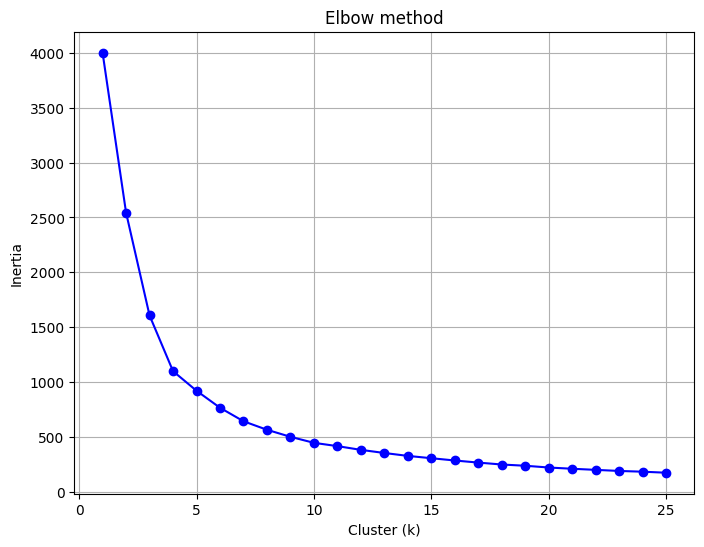

In [ ]:
# Inertia vs k Clusters Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 26), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow method')
plt.xlabel('Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

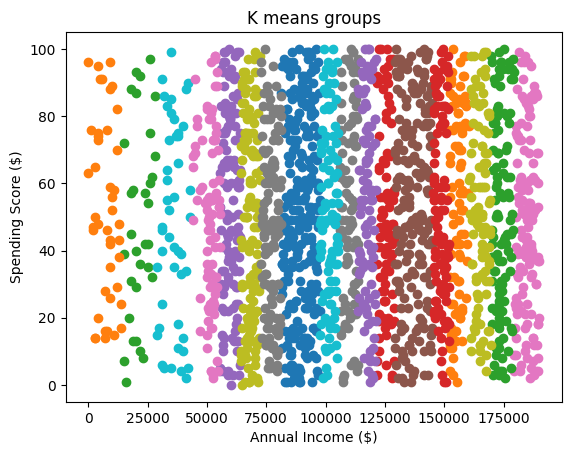

In [ ]:
kmeans = KMeans(n_clusters=20, random_state=0)
kmeans.fit(X)
plt.title('K means groups')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score ($)')
for label in np.unique(kmeans.labels_):
    X_ = X[label == kmeans.labels_]
    plt.scatter(X_['Annual Income ($)'], X_['Spending Score (1-100)'], label=label)
plt.show()

# DBSCAN

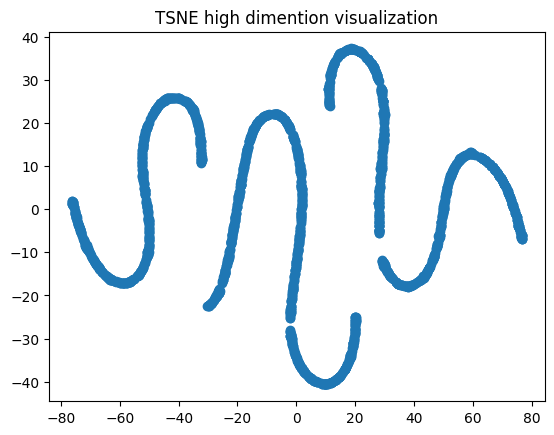

In [ ]:
# Apply TSNE in order to reduce dimensionallity
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Results visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('TSNE high dimention visualization')
plt.show()

In [ ]:
# Define params to adjust
param_grid = {'eps': range(1,19), 'min_samples': range(1, 10)}

# Initiate DBSCAN
dbscan = DBSCAN()

# Configurate GridSearchCV
grid_search = GridSearchCV(dbscan, param_grid, cv=5,scoring='completeness_score')
grid_search.fit(X_tsne)

# Obtain Best Params
best_params = grid_search.best_params_
print("Best Params:", best_params)

# Apply DBSCAN with best params
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
best_labels = best_dbscan.fit_predict(X_tsne)
print("Cluters:", len(np.unique(best_labels)))

Best Params: {'eps': 1, 'min_samples': 1}
Cluters: 25


Now, let's explore the visual representation of the identified clusters.

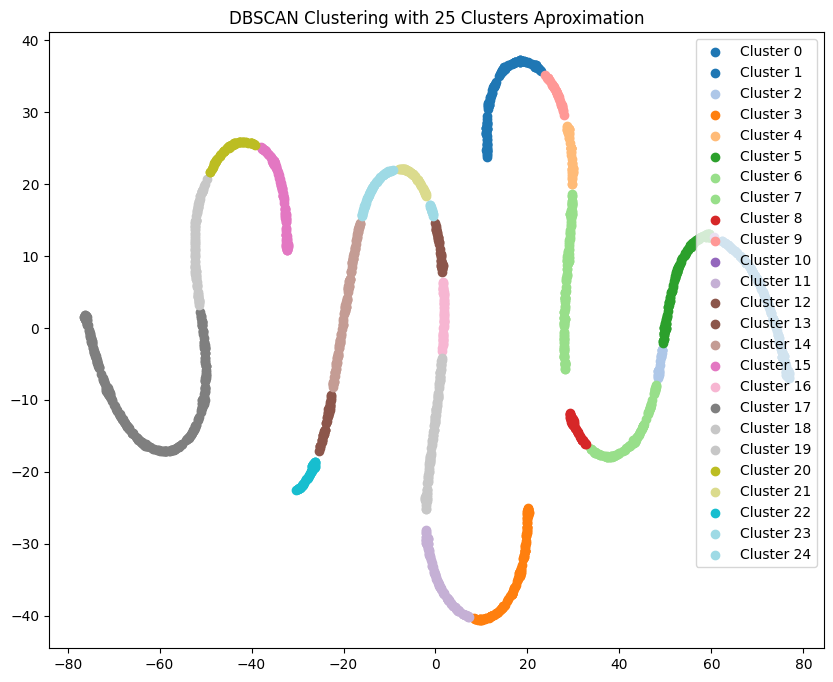

In [ ]:
unique_labels = np.unique(best_labels)

# Seleccionar una paleta de colores para los clusters (puedes cambiar 'tab20' por otra paleta)
colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(unique_labels)))

# Crear una figura
plt.figure(figsize=(10, 8))

# Iterar sobre los clusters y asignar colores
for i, label in enumerate(unique_labels):
    cluster_points = X_tsne[best_labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', marker='o', color=colors[i])

plt.title('DBSCAN Clustering with 25 Clusters Aproximation')
plt.legend()
plt.show()

# Meanshift

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift

# "Scaling the features to achieve a mean of zero and unit variance."
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Apply Mean Shift algorithm
meanshift = MeanShift(bandwidth=0.5)  # Ajusta el valor de ancho de banda según sea necesario
labels = meanshift.fit_predict(scaled_features)

In [ ]:
# Meanshift Clusters
MS_clusters = len(np.unique(labels))

print(f"Clusters: {MS_clusters}")

Clusters: 20


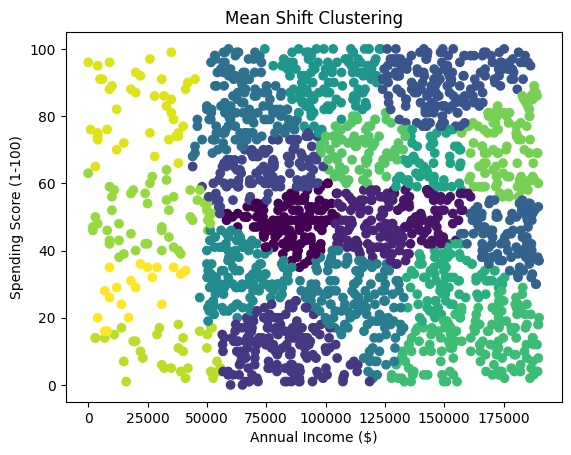

In [ ]:
# Visualize
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.title('Mean Shift Clustering')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()

<div align="center">
  <img src="model_comparison.png">
</div>

## Number of clusters

Mean Shift - Num of clusters: 20
DBSCAN - Num of clusters: 20
K Means - Num of clusters: 25


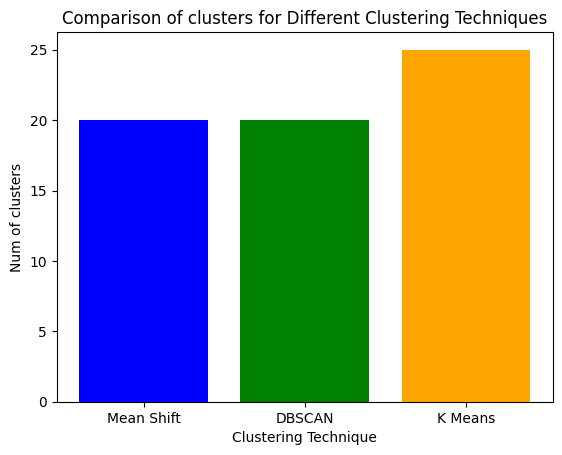

In [ ]:
Kmeans_clusters = 20
MS_clusters = len(np.unique(labels))
DBSCAN_clusters = len(np.unique(best_labels))

num_clusters = [Kmeans_clusters, MS_clusters, DBSCAN_clusters]

# Metrics
clustering_technique = ['Mean Shift', 'DBSCAN', 'K Means']

for i in range(len(num_clusters)):
    print(f'{clustering_technique[i]} - Num of clusters: {num_clusters[i]}')

# Bar Chart
plt.bar(clustering_technique, num_clusters, color=['blue', 'green', 'orange'])
plt.xlabel('Clustering Technique')
plt.ylabel('Num of clusters')
plt.title('Comparison of clusters for Different Clustering Techniques')
plt.show()

To compare these models, we will consider three metrics to determine the most suitable one: `Davis-Bouldin Score`, `Calinski-Harabasz Score` and `Silhouette Score`.

In [ ]:
kmeans_db_score = davies_bouldin_score(X, kmeans.labels_)

kmeans_ch_score = calinski_harabasz_score(X, kmeans.labels_)

kmeans_silhouette = silhouette_score(X, kmeans.labels_)

print("K Means")
print("Davies-Bouldin Index:", kmeans_db_score)
print(f"Calinski Harabasz Score: {kmeans_ch_score}")
print(f"Silhouette Score: {kmeans_silhouette}")

K Means
Davies-Bouldin Index: 0.494473212067037
Calinski Harabasz Score: 34628.76644524609
Silhouette Score: 0.5491466641609974


In [ ]:
DBSCAN_db_score = davies_bouldin_score(X_tsne, best_labels)

DBSCAN_ch_score = calinski_harabasz_score(X_tsne, best_labels)

DBSCAN_silhouette = silhouette_score(X_tsne, best_labels)

print("DBSCAN")
print("Davies-Bouldin Index:", DBSCAN_db_score)
print(f"Calinski Harabasz Score: {DBSCAN_ch_score}")
print(f"Silhouette Score: {DBSCAN_silhouette}")

DBSCAN
Davies-Bouldin Index: 0.5591230730339892
Calinski Harabasz Score: 3632.944228654236
Silhouette Score: 0.4057583510875702


In [ ]:
MS_db_score = davies_bouldin_score(scaled_features, labels)

MS_ch_score = calinski_harabasz_score(scaled_features, labels)

MS_silhouette = silhouette_score(scaled_features, labels)

print("MEAN SHIFT")
print("Davies-Bouldin Index:", MS_db_score)
print(f"Calinski Harabasz Score: {MS_ch_score}")
print(f"Silhouette Score: {MS_silhouette}")

MEAN SHIFT
Davies-Bouldin Index: 0.8929936884601011
Calinski Harabasz Score: 1452.0563023820218
Silhouette Score: 0.30016785566838905


## Davis-Bouldin Score

Mean Shift - DB Score: 0.8929936884601011
DBSCAN - DB Score: 0.5591230730339892
K Means - DB Score: 0.494473212067037


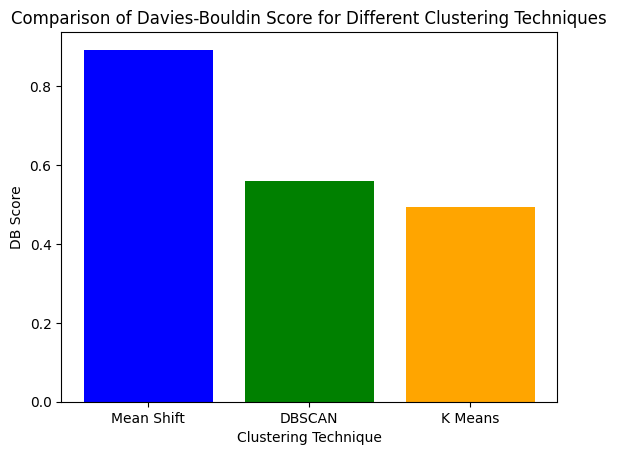

In [ ]:
db_score_metrics = [MS_db_score, DBSCAN_db_score, kmeans_db_score]

# Metrics
clustering_technique = ['Mean Shift', 'DBSCAN', 'K Means']

for i in range(len(db_score_metrics)):
    print(f'{clustering_technique[i]} - DB Score: {db_score_metrics[i]}')

# Bar Chart
plt.bar(clustering_technique, db_score_metrics, color=['blue', 'green', 'orange'])
plt.xlabel('Clustering Technique')
plt.ylabel('DB Score')
plt.title('Comparison of Davies-Bouldin Score for Different Clustering Techniques')
plt.show()

Based on the Davies-Bouldin Index scores for three different clustering algorithms, we can draw some conclusions and compare the methods:

The Davies-Bouldin Index for Mean Shift is relatively high, indicating good quality in cluster segmentation. A value close to 1 suggests better separation between clusters. This result may indicate that Mean Shift has identified well-defined and separated clusters in the data.

The Davies-Bouldin Index for DBSCAN is also relatively low, indicating good quality in cluster segmentation. DBSCAN is known for being effective in identifying clusters with irregular shapes and varying sizes. This value suggests that DBSCAN has successfully identified clusters.

The Davies-Bouldin Index for KMeans is the lowest among the three methods. Although it is lower than that of DBSCAN and Mean Shift, it still indicates good quality in cluster segmentation. This suggests that KMeans has formed well-defined and separated clusters.

## Calinski-Harabasz Score

Mean Shift - CH Score: 1452.0563023820218
DBSCAN - CH Score: 3632.944228654236
K Means - CH Score: 34628.76644524609


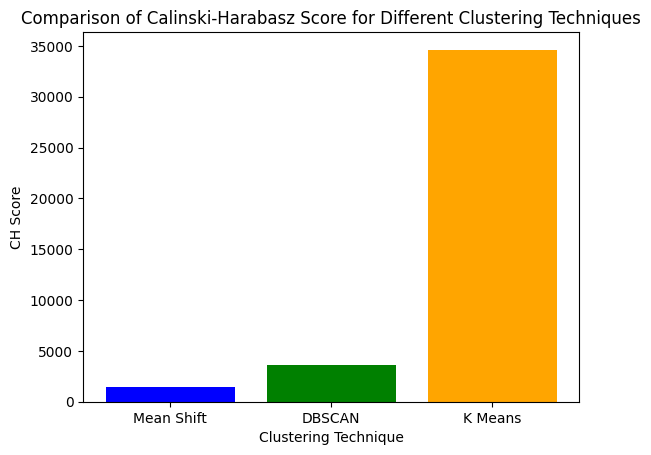

In [ ]:
ch_score_metrics = [MS_ch_score, DBSCAN_ch_score, kmeans_ch_score]

# Metrics
clustering_technique = ['Mean Shift', 'DBSCAN', 'K Means']

for i in range(len(db_score_metrics)):
    print(f'{clustering_technique[i]} - CH Score: {ch_score_metrics[i]}')

# Bar chart
plt.bar(clustering_technique, ch_score_metrics, color=['blue', 'green', 'orange'])
plt.xlabel('Clustering Technique')
plt.ylabel('CH Score')
plt.title('Comparison of Calinski-Harabasz Score for Different Clustering Techniques')
plt.show()

Based on the Calinski-Harabasz Index scores for three different clustering algorithms, we can draw some conclusions and compare the methods:

The Calinski-Harabasz Index for Mean Shift is relatively low compared to DBSCAN and KMeans. A lower value may indicate less clear dispersion between clusters. This suggests that, in this specific dataset, Mean Shift may have clusters that are less densely populated or more scattered.

The Calinski-Harabasz Index for DBSCAN is higher than that of Mean Shift. A higher value indicates better separation between clusters. This suggests that DBSCAN has identified clusters that are more densely populated and better defined compared to Mean Shift.

The Calinski-Harabasz Index for KMeans is the highest among the three methods. A high value indicates good separation between clusters and high density within clusters. This suggests that KMeans has formed well-defined and densely populated clusters.


## Silhouette Score

Mean Shift - Silhouette Score: 0.30016785566838905
DBSCAN - Silhouette Score: 0.4057583510875702
K Means - Silhouette Score: 0.5491466641609974


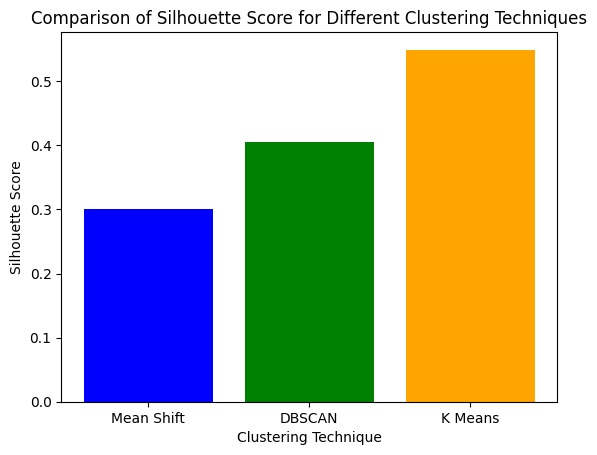

In [ ]:
silhouette_score_metrics = [MS_silhouette, DBSCAN_silhouette, kmeans_silhouette]

# Metrics name
clustering_technique = ['Mean Shift', 'DBSCAN', 'K Means']

for i in range(len(db_score_metrics)):
    print(f'{clustering_technique[i]} - Silhouette Score: {silhouette_score_metrics[i]}')

# Bar chart
plt.bar(clustering_technique, silhouette_score_metrics, color=['blue', 'green', 'orange'])
plt.xlabel('Clustering Technique')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Score for Different Clustering Techniques')
plt.show()

Based on the Silhouette Score for three different clustering algorithms, we can draw some conclusions about the quality of cluster assignments:

The Silhouette Score for Mean Shift is relatively low, suggesting that the clusters may have overlapping regions or that some data points are not well-matched to their assigned clusters.

The Silhouette Score for DBSCAN is higher than that of Mean Shift, indicating a better separation between clusters and more consistent assignment of data points to their respective clusters.

The Silhouette Score for KMeans is the highest among the three methods. A higher Silhouette Score suggests well-defined and dense clusters with good separation between them.

<div align="center">
  <img src="conclusion.png">
</div>

K Means appears to perform the best across all three clustering quality metrics, with the lowest Davies-Bouldin Index, the highest Calinski Harabasz Score, and a relatively high Silhouette Score. It also has the highest number of clusters.

DBSCAN performs reasonably well, but its Davies-Bouldin Index is slightly higher, indicating that clusters might not be as well-separated.

Mean Shift has the highest Davies-Bouldin Index and the lowest Calinski Harabasz Score and Silhouette Score, suggesting that the clusters might be less well-defined and more scattered.

### Possible Model Failures

- Sensitivity to Initial Conditions (K Means):

KMeans is sensitive to initial cluster centers. Random initialization can lead to different results in each run. To mitigate this, consider running KMeans multiple times with different initializations and selecting the solution with the lowest inertia.

- Parameter Sensitivity (Mean Shift and DBSCAN):

The performance of Mean Shift and DBSCAN can be sensitive to their hyperparameters. Suboptimal parameter settings may lead to suboptimal clustering results. It's essential to perform a thorough hyperparameter tuning or explore other clustering algorithms that are less sensitive to hyperparameter changes.

- Difficulty Handling Noise (Mean Shift and DBSCAN):

Mean Shift and DBSCAN can struggle with noisy data points or outliers. If the dataset contains significant noise, these algorithms might misclassify outliers as part of existing clusters or form small clusters for noise. Consider preprocessing or outlier removal techniques.

### Recomendations

- Ensemble Clustering:

Consider using ensemble clustering techniques, where multiple clustering algorithms are combined to achieve more robust results. This approach can help compensate for the weaknesses of individual algorithms.

- Evaluate Alternative Algorithms:

Explore alternative clustering algorithms that might better suit the characteristics of the data. Hierarchical clustering, Gaussian Mixture Models, or other density-based clustering methods could be considered.

- Feature Engineering:

Evaluate the impact of feature engineering on clustering results. It might be beneficial to create new features or transform existing ones to enhance the separability of clusters.

- Visual Inspection:

Visualize the clusters to gain a qualitative understanding of the results. Tools like scatter plots or t-SNE visualizations can help validate if the identified clusters align with the underlying patterns in the data.

- Domain Knowledge Integration:

Integrate domain knowledge into the clustering process. Understanding the business context and characteristics of the data can guide the selection of appropriate algorithms and interpretation of results.